In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv("HR_Analytics.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

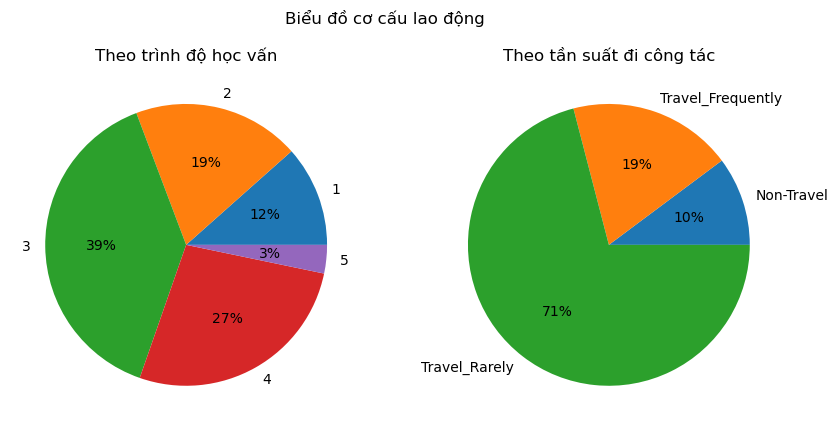

In [3]:
plt.figure(figsize = (10, 10))

temp = data.groupby(['Education'])['Age'].count()
plt.subplot(1,2,1)
plt.pie(temp.values, labels = temp.index, autopct='%1.f%%')
plt.title("Theo trình độ học vấn")

plt.subplot(1,2,2)
temp = data.groupby(['BusinessTravel'])['Age'].count()
plt.pie(temp.values, labels = temp.index, autopct='%1.f%%')
plt.title("Theo tần suất đi công tác")

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

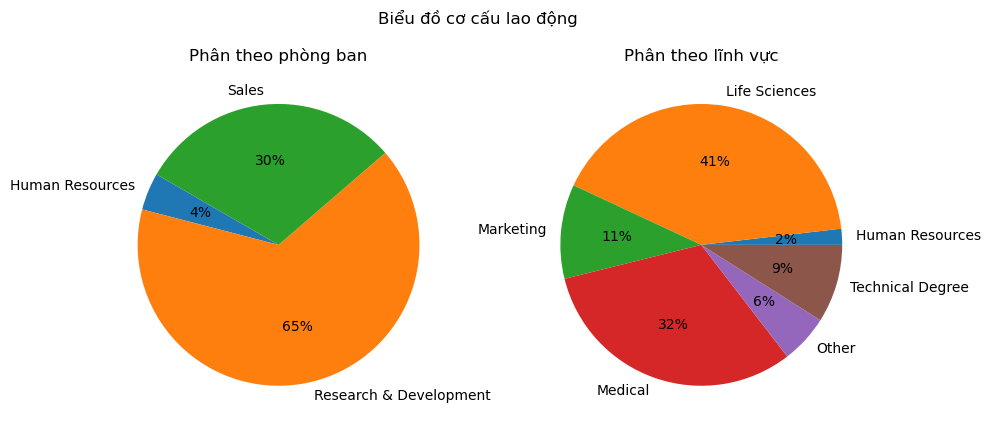

In [4]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
temp = data.groupby(['Department'])['Age'].count()
plt.pie(temp.values, labels = temp.index, autopct='%1.f%%', startangle = 150)
plt.title("Phân theo phòng ban")

plt.subplot(1, 2, 2)
temp = data.groupby(['EducationField'])['Age'].count()
plt.pie(temp.values, labels = temp.index, autopct='%1.f%%')
plt.title("Phân theo lĩnh vực")


plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

Text(0.5, 1.0, 'Theo vai trò của nhân viên trong tổ chức')

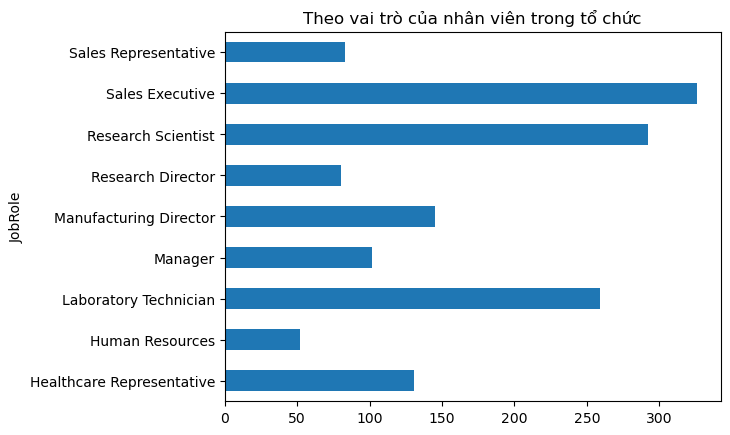

In [5]:
temp = data.groupby(['JobRole'])['Age'].count()
temp.plot(kind = 'barh')
plt.title("Theo vai trò của nhân viên trong tổ chức")

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

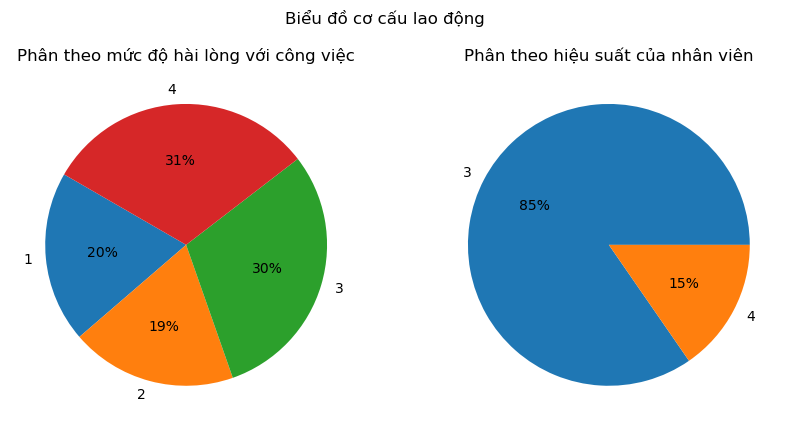

In [6]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
temp = data.groupby(['JobSatisfaction'])['Age'].count()
plt.pie(temp.values, labels = temp.index, autopct='%1.f%%', startangle = 150)
plt.title("Phân theo mức độ hài lòng với công việc")

plt.subplot(1, 2, 2)
temp = data.groupby(['PerformanceRating'])['Age'].count()
plt.pie(temp.values, labels = temp.index, autopct='%1.f%%')
plt.title("Phân theo hiệu suất của nhân viên")


plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

In [7]:
#sns.scatterplot(data = data, x = 'Education', y = 'Age')
temp.groupby 

<bound method Series.groupby of PerformanceRating
3    1244
4     226
Name: Age, dtype: int64>

## Radar chart

Để vẽ sơ đồ so sánh chỉ số trung bình của nhân viên có mức lương cao và thấp thì ta cần định nghĩa thế nào là cao, thế nào là thấp?

Ở đây nhóm lựa chọn mức thấp là __MonthlyIncome <= 3000 và MonthlyIncome >= 15000__ cho mức cao.

Do độ lớn của cột năm chêch lệch lớn với các cột khác nên ta sẽ chia 3 để giữ nguyên tỉ lệ chênh lệch giữa nhóm cao và thấp đồng thời cũng dễ quan sát trên biểu đồ hơn.

In [8]:
status = ['Education', 'NumCompaniesWorked', 'JobLevel', 'YearsInCurrentRole', 'YearsAtCompany']
angles = np.linspace(0,2 * np.pi, len(status), endpoint = False)
angles = np.concatenate((angles, [angles[0]]))
status.append(status[0])
angles

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       0.        ])

In [9]:
low_salary = data[data['MonthlyIncome'] <= 3000]
low_salary = low_salary[status].mean().values
low_salary[3:5] = low_salary[3:5] / 3
low_salary 

array([2.75949367, 2.1164557 , 1.03544304, 0.7443038 , 1.2185654 ,
       2.75949367])

In [10]:
high_salary = data[data['MonthlyIncome'] >= 15000]
high_salary = high_salary[status].mean().values
high_salary[3:5] = high_salary[3:5] / 3
high_salary

array([3.08270677, 3.33834586, 4.51879699, 2.16290727, 4.67669173,
       3.08270677])

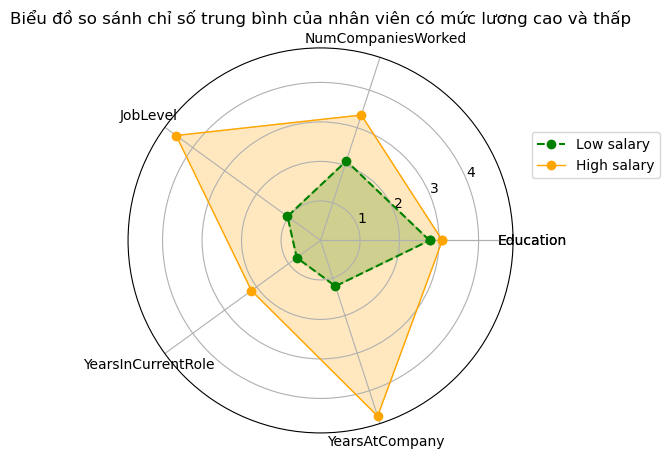

In [11]:
fig=plt.figure(figsize=(5,5))

ax = fig.add_subplot(polar=True)

ax.plot(angles, low_salary, 'o--', color = 'g', label = 'Low salary')
ax.fill(angles, low_salary, alpha = 0.25, color = 'g')

ax.plot(angles, high_salary, 'o-', color = 'orange', linewidth = 1, label='High salary')
ax.fill(angles, high_salary, alpha = 0.25, color='orange')

ax.set_thetagrids(angles * 180 / np.pi, status)

plt.legend(bbox_to_anchor = (1.4, 0.8))
plt.title("Biểu đồ so sánh chỉ số trung bình của nhân viên có mức lương cao và thấp")
plt.show()

## OLS Regression

Nhìn vào biểu đồ radar chart phía trên ta có thể thấy có sự khác biệt giữa những chỉ số trên nếu so sánh giữa những người khác mức lương. Như vậy liệu ta có thể xây dựng mô hình hồi quy dự đoán mức thu nhập hàng tháng của một nhân viên dựa trên những chỉ số này không?

### Ta sẽ thử mô hình hồi quy MonthlyIncome = const + a * C1 + b * C2 với C1 và C2 là 2 attribute được chọn.

#### TH1: Với C1 là NumCompaniesWorked và C2 là YearsAtCompany

In [12]:
# Create the X and y arrays
X = data[['NumCompaniesWorked', 'YearsAtCompany']]
X = sm.add_constant(X)
y = data['MonthlyIncome']
# Fit the OLS model
model = sm.OLS(y, X).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     328.6
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          1.19e-118
Time:                        11:11:49   Log-Likelihood:                -14245.
No. Observations:                1470   AIC:                         2.850e+04
Df Residuals:                    1467   BIC:                         2.851e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2513.9368    199

In [13]:
temp = pd.DataFrame(index = ['R-square', 'Log-likelihood', 'F-statistic', 'AIC', 'BIC'])
temp['TH1'] = [model.rsquared, model.llf, model.fvalue, model.aic, model.bic]

#### TH2: Với C1 là NumCompaniesWorked và C2 là JobLevel (Biến định tính được encode)

In [14]:
# Create the X and y arrays
X = data[['NumCompaniesWorked', 'JobLevel']]
X = sm.add_constant(X)
y = data['MonthlyIncome']
# Fit the OLS model
model = sm.OLS(y, X).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     6850.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:11:49   Log-Likelihood:                -12800.
No. Observations:                1470   AIC:                         2.561e+04
Df Residuals:                    1467   BIC:                         2.562e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1894.0496     86

In [15]:
temp['TH2'] = [model.rsquared, model.llf, model.fvalue, model.aic, model.bic]
temp

,TH1,TH2
R-square,0.309394,0.903273
Log-likelihood,-14245.056405,-12800.285919
F-statistic,328.610893,6849.678715
AIC,28496.112810,25606.571838
BIC,28511.991863,25622.450891


Khi lựa chọn mô hình ta sẽ ưu tiên mô hình có:
- __R-square__, __Log-likelihood__ và __F-statistic__ càng lớn càng tốt
- Sau đó thì ưu tiên đến __AIC__ và __BIC__ càng nhỏ càng tốt.

Nhìn vào dataframe trên ta có thể thấy rõ ràng __mô hình 2__ tốt hơn __mô hình 1__. Như vậy chúng ta sẽ thử sử dụng thủ tục biến giả cho mô hình số 2.

### Dùng thủ tục biến giả
Công thức tìm được sẽ có dạng __MonthlyIncome__ = a * __NumCompaniesWorked__ + b * __JobLevel__ + c * __NumCompaniesWorked__ * __JobLevel__

In [16]:
# Create NumCompaniesWorked * JobLevel column
data["NumCompaniesWorked_JobLevel"] = data['NumCompaniesWorked'] * data['JobLevel']
# Create the X and y arrays
X = data[['NumCompaniesWorked', 'JobLevel', 'NumCompaniesWorked_JobLevel']]
X = sm.add_constant(X)
y = data['MonthlyIncome']
# Fit the OLS model
model = sm.OLS(y, X).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     4586.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:11:49   Log-Likelihood:                -12797.
No. Observations:                1470   AIC:                         2.560e+04
Df Residuals:                    1466   BIC:                         2.562e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [17]:
temp['biengia'] = [model.rsquared, model.llf, model.fvalue, model.aic, model.bic]
temp

,TH1,TH2,biengia
R-square,0.309394,0.903273,0.903702
Log-likelihood,-14245.056405,-12800.285919,-12797.014284
F-statistic,328.610893,6849.678715,4585.877325
AIC,28496.112810,25606.571838,25602.028569
BIC,28511.991863,25622.450891,25623.200639


Quan sát 2 trường hợp có và không có dùng biến giả ta có thể thấy các thông số khác đều giống nhau trừ F-statistic của trường hợp không dùng biến giả lớn hơn khi sử dụng.

Như vậy ta kết luận trong 3 trường hợp đang xét thì trường hợp dự đoán __Thu nhập hàng tháng__ bằng __Số lượng công ty đã làm__ và __Cấp độ công việc__ của công nhân không dùng biến giả mang lại hiệu quả cao nhất.

### Phương trình dự đoán có dạng:

__MonthlyIncome__ = -1894.0496 + 27.1179 * __NumCompaniesWorked__ + 4033.0263 * __JobLevel__

## Vậy thì tỉ lệ nghỉ việc giữa nam và nữ có gì khác nhau không nếu so cùng một độ tuổi

Tại đây ta sẽ encode biến Attrition với 1 là Yes nghĩa là đã nghỉ việc, 0 là No nghĩa là vẫn còn làm tại công ty.

Sau đó ta dùng hàm Logit để tìm phương trình hồi quy logistic của hàm.

Cuối cùng là dùng biểu đồ đường để trực quan mối quan hệ giữa tỉ lệ nhân viên nghỉ việc theo độ tuổi.

Optimization terminated successfully.
         Current function value: 0.394148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448164
         Iterations 6


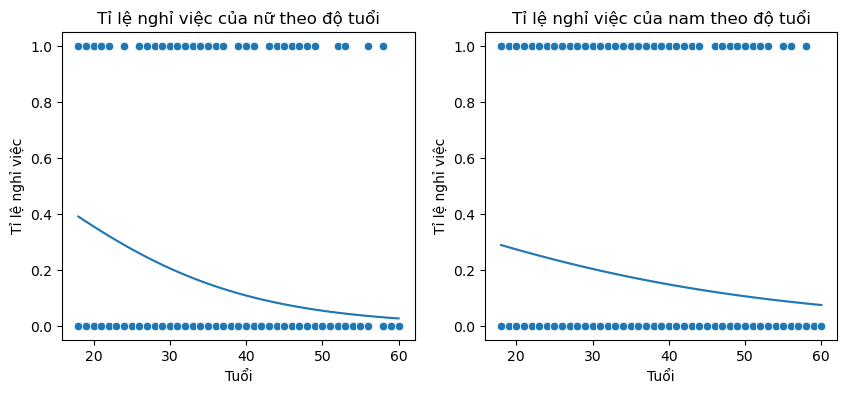

In [18]:
temp = data[data['Gender'] == "Female"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].dropna()
y = temp['Attrition']
X = temp['Age']
X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()
predictions = model1.predict(X)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'Attrition')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ nghỉ việc')
plt.title("Tỉ lệ nghỉ việc của nữ theo độ tuổi")

temp = data[data['Gender'] == "Male"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].dropna()
y = temp['Attrition']
X = temp['Age']
X = sm.add_constant(X)
model2 = sm.Logit(y, X).fit()
predictions = model2.predict(X)

plt.subplot(1, 2, 2)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'Attrition')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ nghỉ việc')
plt.title("Tỉ lệ nghỉ việc của nam theo độ tuổi")
plt.show()

In [19]:
print("Phương trình hồi quy cho nữ: log(y * (1 - y)) = ", round(model1.params[0], 3), '-', round(-model1.params[1], 3), '* x' )
print("Phương trình hồi quy cho nam: log(y * (1 - y)) = ", round(model2.params[0], 3), '-', round(-model2.params[1], 3), '* x' )

Phương trình hồi quy cho nữ: log(y * (1 - y)) =  0.914 - 0.076 * x
Phương trình hồi quy cho nam: log(y * (1 - y)) =  -0.208 - 0.039 * x


Nhìn vào biểu đồ phía trên ta có thể rút ra nhận xét như sau:
- Giống nhau: ở độ tuổi càng nhỏ thì tỉ lệ nhảy việc càng cao và càng lớn tuổi thì khả năng gắn bó với công ty càng cao.
- Khác nhau: Khi còn trẻ nữ sẽ nhảy việc nhiều hơn nam nhưng đồng thời cũng sẽ tìm được công ty phù hợp với mình nhanh hơn như hình trên thì độ dốc của biểu đồ bên nữ cao hơn bên nam.

## Thực hiện tương tự cho tỉ lệ làm thêm giờ giữa nam và nữ có gì khác nhau không nếu so cùng một độ tuổi

Tại đây ta sẽ encode biến Overtime với 1 là Yes nghĩa là làm thêm giờ, 0 là No nghĩa là không làm thêm giờ.

Sau đó ta dùng hàm Logit để tìm phương trình hồi quy logistic của hàm.

Cuối cùng là dùng biểu đồ đường để trực quan mối quan hệ giữa tỉ lệ nhân viên làm thêm giờ theo độ tuổi.

Optimization terminated successfully.
         Current function value: 0.615736
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579007
         Iterations 5


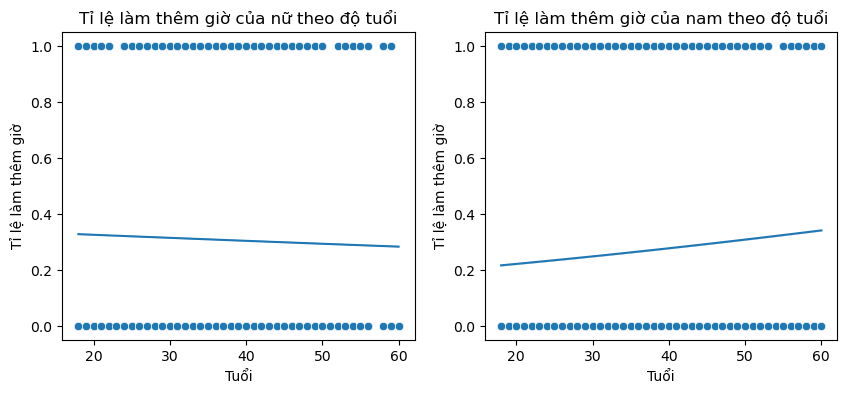

In [25]:
temp = data[data['Gender'] == "Female"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].dropna()
y = temp['OverTime']
X = temp['Age']
X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()
predictions = model1.predict(X)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'OverTime')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.title("Tỉ lệ làm thêm giờ của nữ theo độ tuổi")

temp = data[data['Gender'] == "Male"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].dropna()
y = temp['OverTime']
X = temp['Age']
X = sm.add_constant(X)
model2 = sm.Logit(y, X).fit()
predictions = model2.predict(X)

plt.subplot(1, 2, 2)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'OverTime')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.title("Tỉ lệ làm thêm giờ của nam theo độ tuổi")
plt.show()

In [24]:
print("Phương trình hồi quy cho nữ: log(y * (1 - y)) = ", round(model1.params[0], 3), '-', round(-model1.params[1], 3), '* x' )
print("Phương trình hồi quy cho nam: log(y * (1 - y)) = ", round(model2.params[0], 3), '-', round(-model2.params[1], 3), '* x' )

Phương trình hồi quy cho nữ: log(y * (1 - y)) =  -0.632 - 0.005 * x
Phương trình hồi quy cho nam: log(y * (1 - y)) =  -1.561 - -0.015 * x


Nhìn vào biểu đồ phía trên ta có thể rút ra nhận xét như sau:
- Thời gian đầu nữ làm thêm giờ rất nhiều nhưng về sau lại giảm, còn nam thi càng lớn tuổi thì tỉ lệ làm thêm giờ càng cao. Điều này có thể giải thích bằng việc sau khi kết hôn, phụ nữ sẽ phải dành nhiều thời gian hơn cho gia đình và con cái còn đàn ông thì phải phụ trách chính trong kinh tế.